# explore notebook

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import acquire
import prepare

In [3]:
df_sales = prepare.prepare_sales_data(acquire.join_tables())

Returning saved csv file : items.csv
Got table: items
Returning saved csv file : stores.csv
Got table: stores
Returning saved csv file : sales.csv
Got table: sales


### Make a split

In [14]:
df_sales['sale_date'].max()

Timestamp('2017-12-31 00:00:00+0000', tz='GMT')

In [15]:
df_sales['sale_date'].min()

Timestamp('2013-01-01 00:00:00+0000', tz='GMT')

split everything up to 2017 as train, leaving 2017 as a test

In [22]:
#split everything up to 2017 as train, leaving 2017 as a test

train = df_sales.set_index('sale_date')[:'2016']
test = df_sales.set_index('sale_date')['2017':]

check it split correctly

In [27]:
train.index.max()

Timestamp('2016-12-31 00:00:00+0000', tz='GMT')

In [26]:
test.index.min(), test.index.max()

(Timestamp('2017-01-01 00:00:00+0000', tz='GMT'),
 Timestamp('2017-12-31 00:00:00+0000', tz='GMT'))

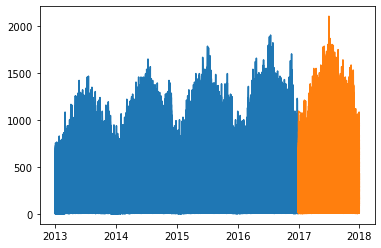

In [34]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730500 entries, 2013-01-01 00:00:00+00:00 to 2016-12-31 00:00:00+00:00
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item             730500 non-null  int64  
 1   sale_amount      730500 non-null  float64
 2   sale_id          730500 non-null  int64  
 3   store            730500 non-null  int64  
 4   item_brand       730500 non-null  object 
 5   item_id          730500 non-null  int64  
 6   item_name        730500 non-null  object 
 7   item_price       730500 non-null  float64
 8   item_upc12       730500 non-null  int64  
 9   item_upc14       730500 non-null  int64  
 10  store_address    730500 non-null  object 
 11  store_city       730500 non-null  object 
 12  store_id         730500 non-null  int64  
 13  store_state      730500 non-null  object 
 14  store_zipcode    730500 non-null  int64  
 15  month            730500 non-null  int64

Visualize without regard to the date

<AxesSubplot:>

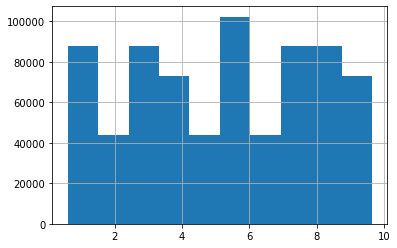

In [38]:
train.item_price.hist()

<AxesSubplot:>

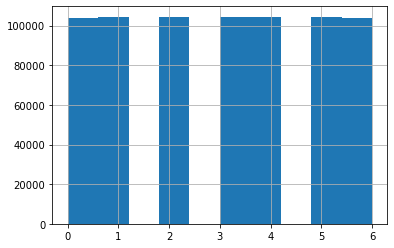

In [39]:
train['day of the week'].hist()

<AxesSubplot:>

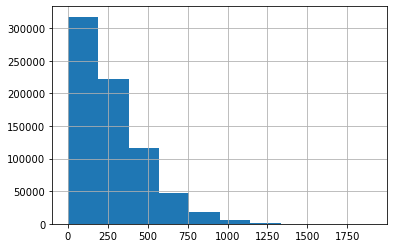

In [40]:
train['sales_total'].hist()

<AxesSubplot:xlabel='month', ylabel='sale_amount'>

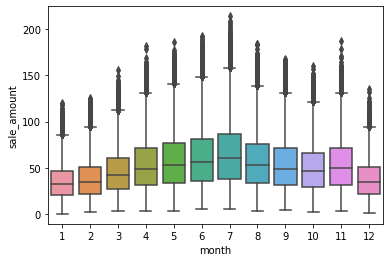

In [105]:
sns.boxplot(data = train, x = 'month', y = 'sale_amount')

Visualize in terms of the date column

<AxesSubplot:xlabel='sale_date'>

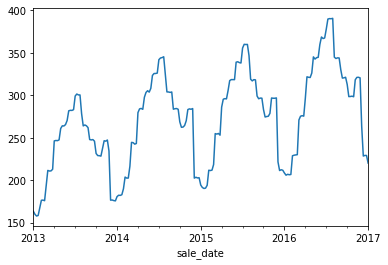

In [44]:
train.resample('W').sales_total.mean().plot()

looks like the sales total has increased over time

<AxesSubplot:xlabel='sale_date'>

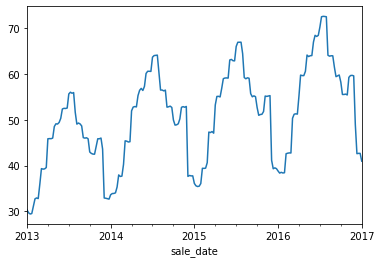

In [59]:
train.resample('W').sale_amount.mean().plot()

More products have been sold every year.  Each year more is sold in the summer.

rolling average of sales_total

<AxesSubplot:xlabel='sale_date'>

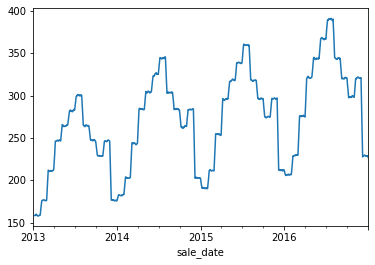

In [57]:
train.resample('D').sales_total.mean().rolling(7).mean().plot()

Looks the same as the resample graph.  This indicates that the sales might be a constant over the week

<AxesSubplot:xlabel='sale_date'>

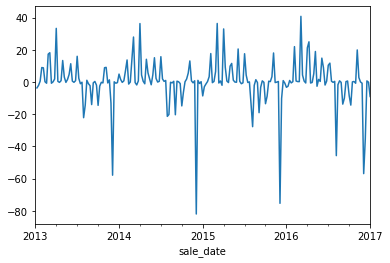

In [69]:
train.resample('W').sales_total.mean().diff().plot()


looks like after christmas there is a steep drop off in sales.  with an increasing sales amount through the spring, and dropping again in the summer.  this in confirmed by the amount sold.

<AxesSubplot:xlabel='sale_date'>

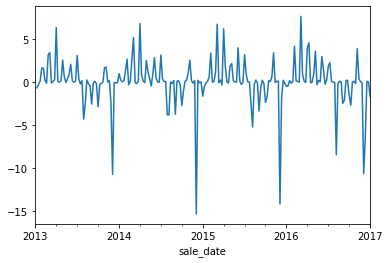

In [70]:
train.resample('W').sale_amount.mean().diff().plot()

Note that it is really messy if plotted as a change over a day, but some trend can still be seen:


<AxesSubplot:xlabel='sale_date'>

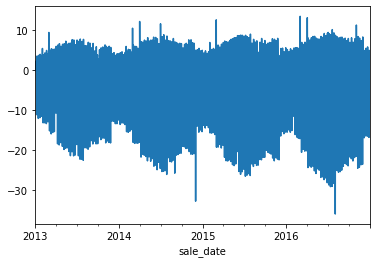

In [73]:
train.resample('D').sale_amount.mean().diff().plot()

Seasonal shopping is clear.  Spring shopping, and the christmas season are increasing sale volumes.

<AxesSubplot:xlabel='sale_date'>

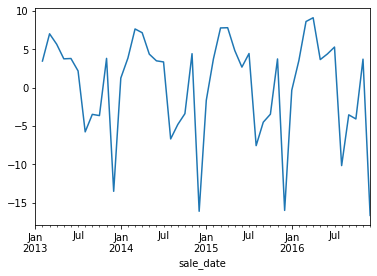

In [74]:
train.resample('M').sale_amount.mean().diff().plot()

Percent change:

<AxesSubplot:xlabel='sale_date'>

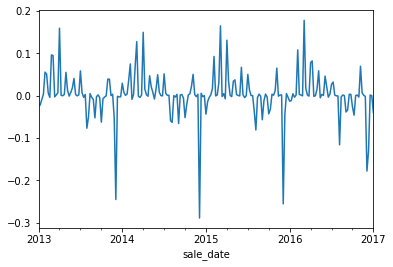

In [77]:
(train.resample('W').sale_amount.mean().diff() / train.resample('W').sale_amount.mean().shift()).plot()

Really shows the post-xmas slump.  it is down sometimes by up to $\approx$ 0.30

In [94]:
train = train.reset_index()
train['year'] = train.sale_date.dt.year
train = train.set_index('sale_date')

In [96]:
train.groupby([train.index.year, train.index.month]).sale_amount.mean()

sale_date  sale_date
2013       1            29.348645
           2            32.815500
           3            39.831097
           4            45.484933
           5            49.241419
           6            53.039800
           7            55.220774
           8            49.468452
           9            45.993800
           10           42.360452
           11           46.176200
           12           32.684323
2014       1            33.934645
           2            37.794071
           3            45.438774
           4            52.594267
           5            56.959806
           6            60.456133
           7            63.807097
           8            57.135226
           9            52.341600
           10           48.960194
           11           53.385533
           12           37.293419
2015       1            35.646000
           2            39.379786
           3            47.158129
           4            54.964467
           5            59.

In [99]:
train.groupby([train.index.year, train.index.month]).sale_amount.mean().unstack(0)

sale_date,2013,2014,2015,2016
sale_date,,,,
1,29.348645,33.934645,35.646000,38.867032
2,32.815500,37.794071,39.379786,42.410828
3,39.831097,45.438774,47.158129,51.024581
4,45.484933,52.594267,54.964467,60.130000
5,49.241419,56.959806,59.800129,63.789032
6,53.039800,60.456133,62.478933,68.177600
7,55.220774,63.807097,66.925806,73.465677
8,49.468452,57.135226,59.380710,63.322194
9,45.993800,52.341600,54.888800,59.788733


<AxesSubplot:xlabel='sale_date'>

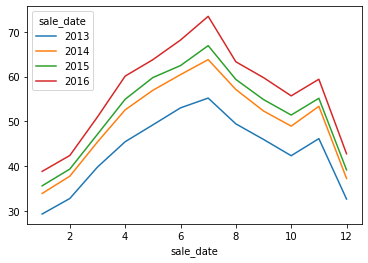

In [100]:
train.groupby([train.index.year, train.index.month]).sale_amount.mean().unstack(0).plot()

More evidence of post-xmas and summer slump in sales.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

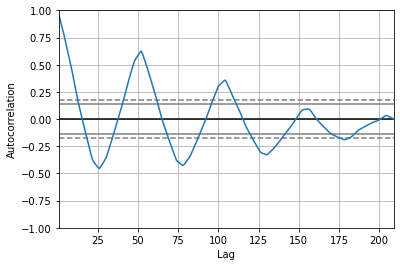

In [101]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())

Looks like there is some seasonal autocorrelation

<AxesSubplot:xlabel='sale_date'>

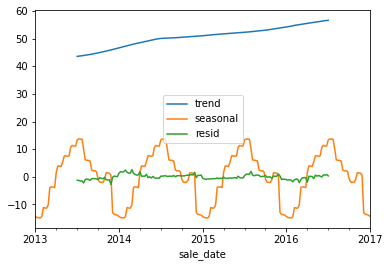

In [110]:
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomposition.iloc[:, 1:].plot()

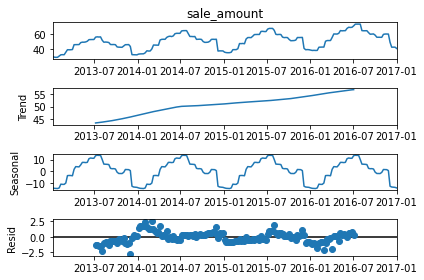

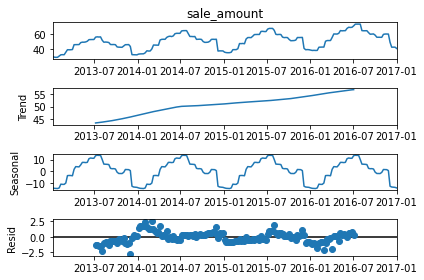

In [111]:
result.plot()

it looks like there was something happening in 2014 that made the residuals more extreme.  However, the trend is explaining the amoun in 2015 well because there are low residuals.

### German energy data

In [113]:
df = prepare.prepare_energy_german(acquire.get_german_energy_data())

Make a split

In [115]:
train = df.set_index('Date')[:'2013']
test = df.set_index('Date')['2013':]

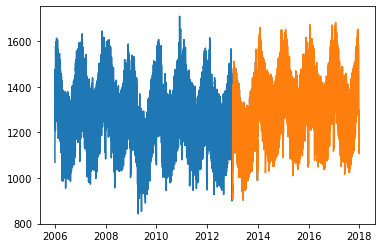

In [118]:
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

<AxesSubplot:xlabel='Date'>

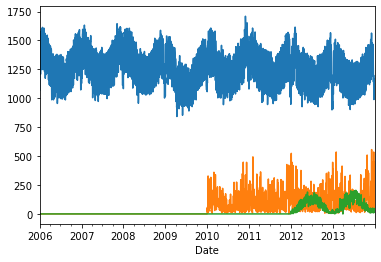

In [121]:
train.Consumption.plot()
train.Wind.plot()
train.Solar.plot()

<AxesSubplot:xlabel='Date'>

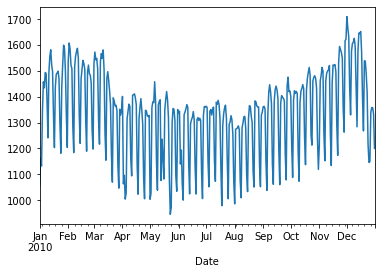

In [125]:
train['2010-01-01':'2010-12-31'].Consumption.plot()

Consumption is lower in the summer, and higher in the colder months of the year.  It also looks like the weekends have lower consumption than the weekdays.  Perhaps office buildings require more energy.

<AxesSubplot:xlabel='Date'>

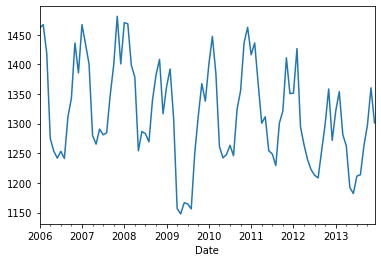

In [127]:
train.resample('M').Consumption.mean().plot()

<AxesSubplot:xlabel='Date'>

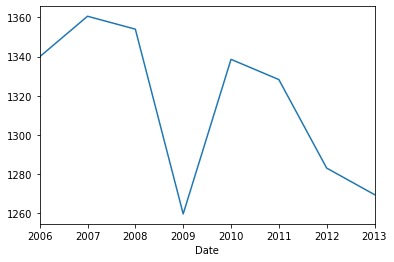

In [128]:
train.resample('Y').Consumption.mean().plot()

Monthly plot definitely shows the summer drop in electricity use.